---
layout: post
title:  "Clustering: DBScan"
date:   2023-04-14 12:14:54 +0700
categories: MachineLearning
---

# Introduction
Clustering is the task of grouping object into sub classes. DBScan is a density based algorithm to cluster dataset with noise. This allows looking for clusters of arbitrary shapes and no need to determine the number of clusters in the first place. Since for large dataset, it is very hard to know in advance those parameters.  

Usually, we have two types of clustering algorithms: partitioning and hierarchical. Partitioning is when we construct a partition of database D of n objects into a set of k clusters. k is an input parameter which comes from domain knowledge which does not guarantee to be present in all cases. THe partitioning algorithm typically starts with an initial partition of D and then applies an iterative strategy to optimize an objective function. Each cluster is represented by its gravity center (k-means) or by one of the object near the center (k-medoids). This makes it a two step procedure: first determine k representatives that minimize the objective function, second assign objects to cluster with the closest center. The second step turns the partition into a Voronoi diagram, making the shape of each cluster convex. Hierarchical algorithm, on the other hand, decomposes the dataset D hierarchically, making a dendrogram out of it. A dendrogram is a tree that iteratively splits D into smaller subsets until each subset has only one data point. In such a scheme, each node of the tree is one cluster of D. The dendrogram can be created from the leaves up to the root (agglomerative approach) or vice versa (divisive approach). This method doesn't need a k as input. However it needs a termination condition. One condition is the distace $$ D_{min} $$ between all the clusters. So far the main challenge with the hierarchical clustering is deciding the termination condition, finding a $$ D_{min} $$ small enough to separate all supposed clusters, and large enough to not split any clusters into halves. 


# Density based cluster

<img width="536" alt="Screen Shot 2023-04-18 at 16 27 29" src="https://user-images.githubusercontent.com/7457301/232735593-18805b89-19ed-4bc7-a14e-54b28dd94634.png">

Image: clusters that we can easily comprehend its density

When we look at the sample databases in the image, we can intuitively see that density inside a cluster is high and density for noises are much lower. The author then formalize this intuition on defining characters of a cluster in a k-dimensional space S. This generalizes well to high dimensional space. The main idea is that for a point inside a cluster, there must be a minimum number of points in its neighborhood of a given radius. In other words, the density in the neighborhood has to exceed some threshold. The distance function is denoted d(p,q) for two points p and q. The epsilon neighborhood of a point is then $$ N(p) = \{ q \in D: d(p,q) \leq \epsilon \} $$.

We define a directly density reachability to be: a point p is directly density reachable from a point q if p is in q $$ \epsilon $$ neighborhood and q's $$ epsilon $$ neighborhood has at least m number of points. The second condition is the core point condition (making q the core point). For a pair of core points, the direct density reachability is symmetric. For a pair of core point and border point the relationship is not symmetric. 

We then define a density reachability to be:  a point p is density reachable from q if there is a chain of point $$ p_1, ..p_n $$ with $$ p_1 = q, p_n = p $$ such that $$ p_{i+1} $$ is directly density reachable from $$ p_i $$. This relation is transitive but not symmetric. It is symmetric for core points though. Two border points of the same cluster, according to this definition, would not be density reachable but there must be a core point that can density reach both.

So we define a point p is density connected to a point q if there is a point o such that both p and q are density reachable from o. This relationship is symmetric. At this point, we are ready to define a density based cluster: a cluster is a set of density connected points. Noises would then become the set of points in D that does not belong to any of the clusters. With this definition, we can identify both clusters and noises. 

The formal definition of a cluster: Let D be a database of points. A cluster C with respect to $$ \epsilon $$ and m minpoints is a non empty subset of D satisfying the following conditions:

- $$ \forall $$ p, q: if p $$ \in $$ C and q is density reachable from p, then q $$ \in $$ C (maximality). This is to collect all the possible points into one cluster.

- $$ \forall $$ p, q $$ \in $$ C, p is density connected to q (connectivity)

The definition of noise would then be: Let $$ C_1, ..C_k $$ be the clusters of the database D. Noise would be the set of points that does not belong to any of cluster $$ C_i, i = 1,..k $$. In other words, noise = $$ \{ p \in D: \forall i: p \notin C_i \} $$.

To find a cluster, DBSCAN starts ưith an arbitrary point p and collect all points density reachable from p with respect to $$ \epsilon $$ and MinPts. 

<img src="https://imgur.com/9D6aAF2.gif">

# Code example
In the example, we will see the demonstration of DBSCAN on datasets that prove to be challenging for other methods, such as k-means. However, the segmenting is sensitive to $$ \epsilon $$ and it doesn't do so well on Iris dataset.

In [78]:
from sklearn import cluster, datasets, mixture
# make dataset
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

In [57]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit_predict(noisy_circles[0])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,

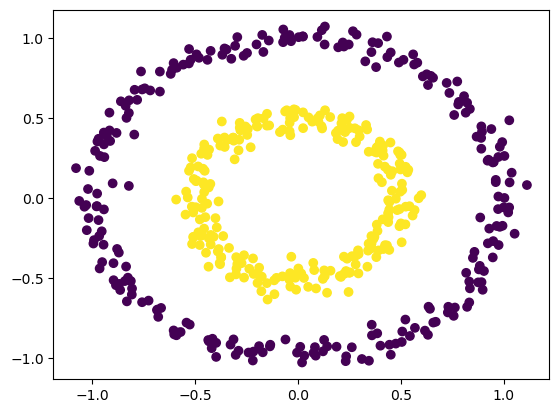

In [58]:
y=dbscan.labels_
plt.scatter(noisy_circles[0][:,0],noisy_circles[0][:,1],c=y)
plt.show()

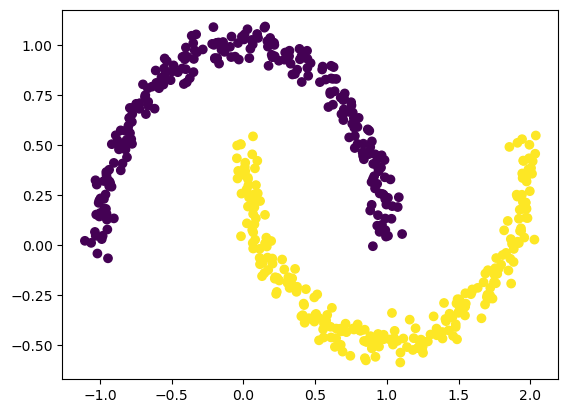

In [60]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
dbscan.fit_predict(noisy_moons[0])
y=dbscan.labels_

plt.scatter(noisy_moons[0][:,0],noisy_moons[0][:,1],c=y)
plt.show()

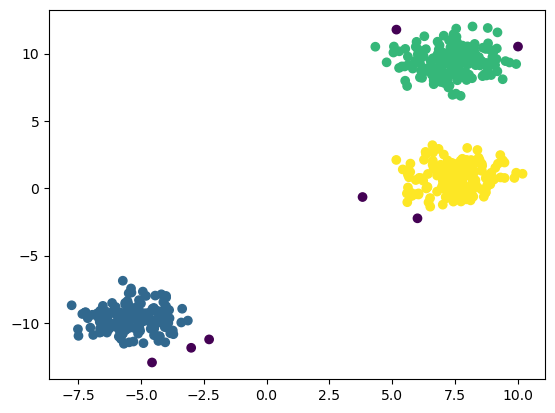

In [64]:
dbscan = DBSCAN(eps=0.8, min_samples=3)
dbscan.fit_predict(blobs[0])
y=dbscan.labels_
plt.scatter(blobs[0][:,0],blobs[0][:,1],c=y)
plt.show()

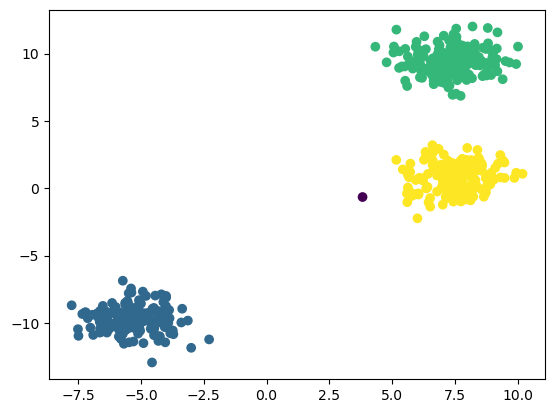

In [66]:
# DBSCAN is sensitive to epsilon
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit_predict(blobs[0])
y=dbscan.labels_
plt.scatter(blobs[0][:,0],blobs[0][:,1],c=y)
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


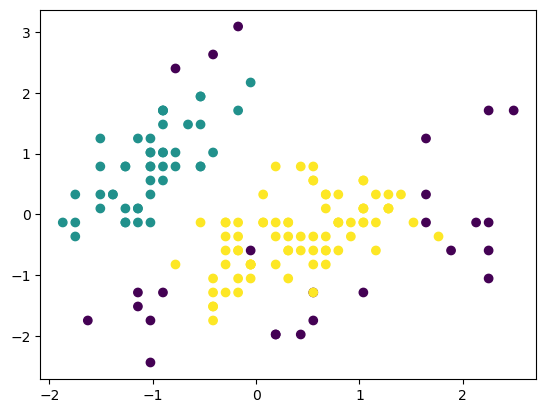

In [73]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Standardize the dataset
X = StandardScaler().fit_transform(iris.data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X)

# Print the cluster labels
print(dbscan.labels_)
y=dbscan.labels_
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()